(1 балл) Подготовить мини-корпус (не меньше 4 текстов, примерный общий объём - 3-5 тысяч токенов) с разметкой ключевых слов. Предполагается, что вы найдете источник текстов, в котором уже выделены ключевые слова. Укажите источник корпуса и опишите, в каком виде там были представлены ключевые слова.

(2 балла) Разметить ключевые слова самостоятельно. Оценить пересечение с имеющейся разметкой. Составить эталон разметки (например, пересечение или объединение вашей разметки и исходной).

(2 балла) Применить к этому корпусу 3 метода извлечения ключевых слов на выбор (RAKE, TextRank, tf*idf, OKAPI BM25, ...)

(2 балла) Составить морфологические/синтаксические шаблоны для ключевых слов и фраз, выделить соответствующие им подстроки из корпуса (например, именные группы Adj+Noun). Применить эти фильтры к спискам ключевых слов.

(2 балла) Оценить точность, полноту, F-меру выбранных методов относительно эталона: с учётом морфосинтаксических шаблонов и без них.

(1 балл) Описать ошибки автоматического выделения ключевых слов (что выделяется лишнее, что не выделяется); предложить свои методы решения этих проблем.

Статьи с упоминанием российской игровой компании Ice-pick lodge

https://cyberleninka.ru/article/n/kompyuternaya-igra-v-prostranstve-kultury
https://cyberleninka.ru/article/n/iskusstvo-igry
https://cyberleninka.ru/article/n/iskusstvo-i-dizayn-v-kompyuternyh-videoigrah
https://cyberleninka.ru/article/n/industriya-videoigr-v-sovremennoy-otraslevoy-ekonomike

Все они довольно старые и написаны исследователями из искусствоведения/философии, общества и ставят вопрос, могут ли "игры быть искусством", и пытаются это доказать.

Такая странная подборка, потому что руководитель Айспик лодж произнес фразу, которая стала притчей во языцех: "ИГРЫ ЭТО ИСКУССТВО А НЕ РАЗВЛЕЧЕНИЕ!!!". В этих статьях авторы доказывают, что этот тезис правдив, и что Айспик лодж это самые интересные представители российской индустрии, поэтому таким странным образом на киберленинке нашлись почти одинаковые по смыслу статьи, одна из которых вообще цитируют другую.

#### libraries

In [3]:
import re
import RAKE
from summa import keywords
from nltk.corpus import stopwords
stops = set(stopwords.words('russian'))
import stanza
from nltk.tokenize import RegexpTokenizer
from pymorphy2 import MorphAnalyzer
import yake


tokenizer = RegexpTokenizer(r'[\w-]+')
morph = MorphAnalyzer()
stops = list(stops) + ['это', 'пр', 'который', 'свой', 'любой', 'несколько', 'частый', 'самый', 'также']
rake = RAKE.Rake(stops)
nlp = stanza.Pipeline("ru")
kw_extractor = yake.KeywordExtractor()

2021-11-06 21:17:48 INFO: Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| pos       | syntagrus |
| lemma     | syntagrus |
| depparse  | syntagrus |
| ner       | wikiner   |

2021-11-06 21:17:48 INFO: Use device: cpu
2021-11-06 21:17:48 INFO: Loading: tokenize
2021-11-06 21:17:48 INFO: Loading: pos
2021-11-06 21:17:48 INFO: Loading: lemma
2021-11-06 21:17:49 INFO: Loading: depparse
2021-11-06 21:17:49 INFO: Loading: ner
2021-11-06 21:17:51 INFO: Done loading processors!


#### lemmatization

In [49]:
with open('keywords and essays.txt', encoding='utf-8') as f:
    text = f.read()
parts = text.split('\n$$\n')

def tokenize_lemmatize(doc):
    tokens = tokenizer.tokenize(doc)
    tokens = [morph.parse(token)[0].normal_form for token in tokens]# if morph.parse(token)[0].normal_form not in stops]
    tokens = [token for token in tokens if re.search('[А-яЁё]', token)]
    preprocessed_line = ' '.join(tokens)
    return preprocessed_line

tk_list = []
tkt_list = []
for part in parts:
    keys, mykeys, text = part.split('\n')
    ks = [tokenize_lemmatize(key) for key in list(set(keys.split(', ') + mykeys.split(', ')))]
    tkt_list.append([text, ks])
    
stanza_lem = []
tk_dict = {}
for n, tk in enumerate(tkt_list):
    doc = nlp(tk[0])
    toks = [word.lemma for sent in doc.sentences for word in sent.words]
    some_dict = {}
    some_dict['lemmatized'] = ' '.join(toks)
    pos = [word.pos for sent in doc.sentences for word in sent.words] 
    some_dict['pos'] = pos
    some_dict['keys'] = tk[1]
    tk_dict[n] = some_dict
    
for i in tk_dict.keys():
    keys, mykeys, text = parts[i].split('\n')
    tk_dict[i]['keys'] = [tokenize_lemmatize(key) for key in list(set(keys.split(', ') + mykeys.split(', ')))]

#### rake

In [50]:
for i in range(len(tk_dict)):
    k_rake = rake.run(tk_dict[i]['lemmatized'], maxWords=5, minFrequency=3)
    print(k_rake, '\n')
    tk_dict[i]['rake'] =  [k[0] for k in k_rake]

[('компьютерный игра', 5.475), ('искусство', 2.96), ('игра', 2.6), ('цвет', 2.357142857142857), ('герой', 2.111111111111111), ('город', 2.090909090909091), ('однако', 2.0), ('эмоция', 1.8333333333333333), ('предел', 1.8), ('развлечение', 1.75), ('сестра', 1.6666666666666667), ('тургор', 1.4285714285714286), ('утопия', 1.3333333333333333), ('промежутка', 1.25), ('мор', 1.0), ('многогранник', 1.0), ('брат', 1.0), ('[ 2', 0)] 

[('целый искусство', 5.187096774193549), ('игра', 2.8333333333333335), ('искусство', 2.3870967741935485), ('являться', 2.142857142857143), ('шахматы', 2.0), ('пример', 1.8571428571428572), ('перипетие', 1.0)] 

[('компьютерный игра', 6.0432402846195945), ('видеоигр', 3.1578947368421053), ('ки', 2.857142857142857), ('мочь', 2.75), ('игрок', 2.7222222222222223), ('игра', 2.6984126984126986), ('образ', 2.6470588235294117), ('форма', 2.5555555555555554), ('жизнь', 2.4444444444444446), ('искусство', 2.282051282051282), ('время', 2.0), ('жанр', 2.0), ('делать', 1.8571428

Корпус немаленький, но все равно вышло скудно. На minfreq 2 выдает всякие бессмысленные повторения

Думаю, что вывод был бы лучше, если бы я добавила название статей, но я их убирала, т.к. они все-таки лишь повторение мыслей из текста и было бы здорово посмотреть, что выделяют без такой подсказки

#### textrank

In [61]:
for i in range(len(tk_dict)):
    k_textrank = keywords.keywords(tk_dict[i]['lemmatized'], language='russian', additional_stopwords=stops, scores=True)[:10]
    tk_dict[i]['textrank'] = [k[0] for k in k_textrank]
    print(tk_dict[i]['textrank'], '\n')

['игру', 'компьютерный игра', 'называть', 'цвет', 'цветов', 'игрок', 'называться развлечение', 'новый вид искусство', 'человек', 'являться'] 

['игра', 'искусство', 'шахматный', 'цель', 'целый', 'необходимый', 'необходимость', 'игровой', 'понятие', 'произведение'] 

['искусство', 'художественный', 'художественно', 'настоящий время компьютерный игра', 'ки', 'игрок', 'весь', 'понять степень художественность', 'мочь', 'возможность'] 

['компания', 'российский', 'игр', 'индустрия видеоигр', 'год', 'компьютерный игра среди', 'иметься', 'россия являться', 'объем рынок', 'игровой отрасль'] 



Также оказалось, что станза кривовато лемматизирует, где-то она оставляет например "игру"

tfidf и оками бм25 мне скорее не подходят, т.к. тексты очень похожие, ключевые слова во многом одинаковые

####  yake

In [81]:
custom_kw_extractor = yake.KeywordExtractor(lan='ru', n=2, dedupLim=0.2, top=10, features=None)

for i in range(len(tk_dict)):
    tk_dict[i]['textrank'] = [k[0] for k in k_textrank[:20]]

    kw = custom_kw_extractor.extract_keywords(tk_dict[i]['lemmatized'])

    print([k[0] for k in kw], '\n')
    tk_dict[i]['yake'] = [k[0] for k in kw]

['компьютерный игра', 'Германия Совет', 'Робин Коллингвуд', 'Renaud Donnedieu', 'York Times', 'Джилберт Сел-дес', 'The New', 'New York', 'искусство', 'вызывать ради'] 

['игра', 'искусство', 'шахматный', 'пример', 'являться', 'сколь неудовлетворительно', 'случай предполагать', 'предполагать человеческий', 'Брехт', 'точка'] 

['компьютерный игра', 'искусство', 'Gaming Alliance', 'Renaud Donnedieu', 'New York', 'York Times', 'Франция Рено', 'Рено Дон-недье', 'образ', 'The New'] 

['миллиард доллар', 'российский Федерация', 'компания', 'игра', 'рынок', 'специалист', 'производитель', 'являться', 'объем российский', 'War Thunder'] 



####  syntax patterns

Вышло негусто, поэтому шаблоны очень простые ADJ + NOUN и NOUN + NOUN (именные группы, часто иг с прилагательным и зависимым в генитиве), но в одной из статей по шаблонам 0

In [62]:
tk_dict[0]['textrank']

['игру',
 'компьютерный игра',
 'называть',
 'цвет',
 'цветов',
 'игрок',
 'называться развлечение',
 'новый вид искусство',
 'человек',
 'являться']

In [63]:
for i in range(len(tk_dict)):
    tk_dict[i]['keys'] = [i.lower() for i in tk_dict[i]['keys']]
    
for i in range(len(tk_dict)):
    synt_list = []
    for key in tk_dict[i].keys():
        if key in ['textrank', 'rake', 'yake']:
            
            tk_dict[i][key] = [kw.lower() for kw in tk_dict[i][key]]
            ks = []
            for k in tk_dict[i][key]:
                k = k.split(' ')
                pos_tags = [str(morph.parse(k_word)[0].tag).split(',')[0].replace(' masc', '').replace(' femn', '') for k_word in k]
                ks.append(pos_tags)
            syntax_keys = []
            for n, k in enumerate(ks):
                if re.search('ADJFNOUN', ''.join(k)) or re.search('NOUNNOUN', ''.join(k)):
                    syntax_keys.append(tk_dict[i][key][n])
            
            synt_list.append([f'syntax_{key}', syntax_keys])
    for k, v in synt_list:
        tk_dict[i][k] = v

##### оценка точности

In [10]:
import pandas as pd

In [68]:
metrics_list = []
for i in range(len(tk_dict)):
    
    for key in tk_dict[i].keys():
        if key in ['textrank', 'rake', 'yake', 'syntax_textrank', 'syntax_rake', 'syntax_yake']:
            found = 0
            for k in tk_dict[i][key]:
                if k in tk_dict[i]['keys']:
                    found += 1
           # print(len(tk_dict[i][key]))
            if found > 0:
                precision = found/len(tk_dict[i][key])
                recall = found/len(tk_dict[i]['keys'])
                fscore = 2 * precision * recall /(precision + recall)
                metrics_list.append([i, key, round(precision, 3), round(recall, 3), round(fscore, 3)])
            else:
                metrics_list.append([i, key, 0, 0, 0, 0])
           # print([key, precision, recall, fscore])
        
for i in range(len(metrics_list)):
    tk_dict[metrics_list[i][0]][f'{metrics_list[i][1]}_precision'] = metrics_list[i][2]
    tk_dict[metrics_list[i][0]][f'{metrics_list[i][1]}_recall'] = metrics_list[i][3]
    tk_dict[metrics_list[i][0]][f'{metrics_list[i][1]}_fscore'] = metrics_list[i][4]

In [69]:
pd.DataFrame.from_dict(tk_dict)

,0,1,2,3
lemmatized,в начало xx столетие вряд ли кто-то расцениват...,"игра старший культура , так как понятие культу...",в настоящий время компьютерный игра — часть жи...,индустрия видеоигр в Россия являться противоре...
pos,"[ADP, NOUN, NUM, NOUN, ADV, PART, PRON, VERB, ...","[NOUN, ADJ, NOUN, PUNCT, ADV, SCONJ, NOUN, NOU...","[ADP, ADJ, NOUN, ADJ, NOUN, PUNCT, NOUN, NOUN,...","[NOUN, NOUN, ADP, PROPN, VERB, ADJ, NOUN, NOUN..."
keys,"[тургор, утопия, симулятор душа, развлекательн...","[искусство, брехт, технический, творчество, иг...","[виртуальный мир, духовный ценность, видеоигра...","[отраслевый, геймдева, видеоигра, индустрия, р..."
rake,"[компьютерный игра, искусство, игра, цвет, гер...","[целый искусство, игра, искусство, являться, ш...","[компьютерный игра, видеоигр, ки, мочь, игрок,...","[производитель видеоигр, весь мир, 6 миллиард ..."
textrank,"[игру, компьютерный игра, называть, цвет, цвет...","[игра, искусство, шахматный, цель, целый, необ...","[искусство, художественный, художественно, нас...","[компания, российский, игр, индустрия видеоигр..."
yake,"[компьютерный игра, германия совет, робин колл...","[игра, искусство, шахматный, пример, являться,...","[компьютерный игра, искусство, gaming alliance...","[миллиард доллар, российский федерация, компан..."
syntax_rake,[компьютерный игра],[целый искусство],[компьютерный игра],"[производитель видеоигр, весь мир, 6 миллиард ..."
syntax_textrank,"[компьютерный игра, новый вид искусство]",[],"[настоящий время компьютерный игра, понять сте...","[индустрия видеоигр, компьютерный игра среди, ..."
syntax_yake,"[компьютерный игра, германия совет, робин колл...",[],"[компьютерный игра, франция рено, рено дон-недье]","[миллиард доллар, российский федерация]"
rake_precision,0.167,0.429,0.095,0


In [78]:
df = pd.DataFrame.from_dict(tk_dict)
metrics = df[df.applymap(lambda x: isinstance(x, (int, float)))].dropna()
pd.DataFrame(metrics.mean(axis=1).sort_values())

,0
syntax_textrank_recall,0.04175
syntax_rake_recall,0.04350
syntax_yake_recall,0.06625
syntax_textrank_fscore,0.07150
syntax_rake_fscore,0.08025
syntax_yake_fscore,0.10550
textrank_recall,0.11150
textrank_fscore,0.12700
rake_fscore,0.14650
textrank_precision,0.15000


Лучший результат показал yake, у него в среднем лучшая f-мера. Если использовать синтаксические шаблоны, повышается точность, но при этом падает полнота, и поэтому ф-мера тоже. Rake норм, Textrank плоховат по статистике, но он единственный показал что-то приличное на 4-м тексте, остальные алгоритмы слишком ориентировались на повторения слов. Так что тут вопросы, что станза подкачала + слишком длинные н-граммы надо учитывать, разбивая их. Если например слово из н-граммы в ключах, то это +1, а так оно теряется.

Я еще пробовала spacy, но в русской версии он умеет только ner выделять, хоть в статье на towardsdatascience показывали пример с ключевыми по такой же команде.

Лишними выделяются частотные слова, например, пересказ сюжета про "предел, братьев, сестер" из Тургора. Сама статья не об этом, просто часто упоминается. (Тургор -- одна из 2вух игр Ice-pick Lodge, а в этих статья этими играми и доказывают, что игры суть искусство).

Также часто в ключах пишут существительное, а алгоритмы выделяют прилагательные (шахматный-шахматы), можно использовать для оценки стемминг. А для человека неважно, я думаю, прилагательное или существительное выделилось.

Тут также подпортил результат местами кривой разбор станзы, но я изначально делала с пайморфи, и станза в целом получше разбирала и на ее основе было больше ключевых слов в целом. Но зато терялось что-то типа "игра" - "игр" в лемматизации станзы. Тут же опять помог бы стемминг.

Я вытащила статьи по искусству, поэтому высокие рассуждения-обобщения про "симулятор души" (это опять про Тургор))) конечно не вытягиваются.

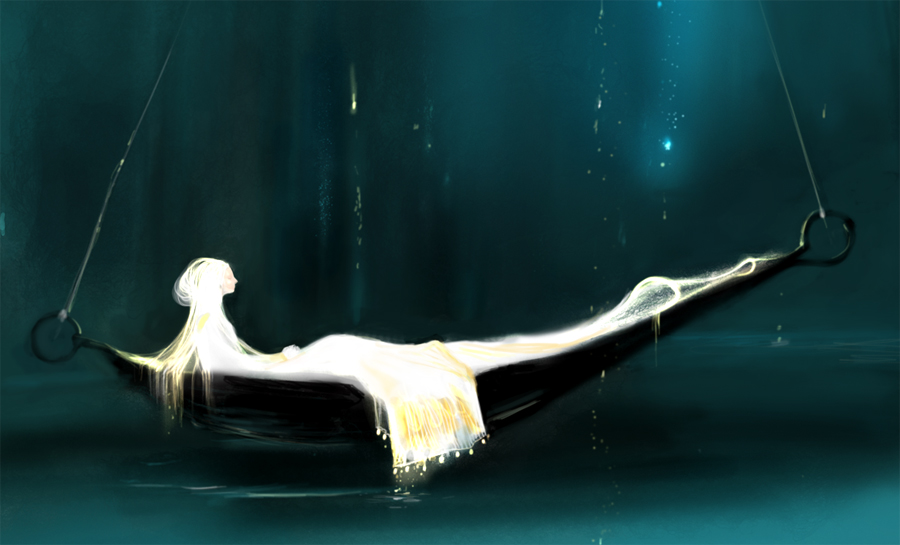